In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets, manifold

In [ ]:
sr_X, sr_color = datasets.make_swiss_roll(n_samples=2000, random_state=42)


In [9]:
len(sr_X)

2

In [6]:
sr_color

array([ 8.24234644, 13.67266022, 11.61126935, ...,  5.36230297,
        5.25011706,  7.3719395 ], shape=(2000,))

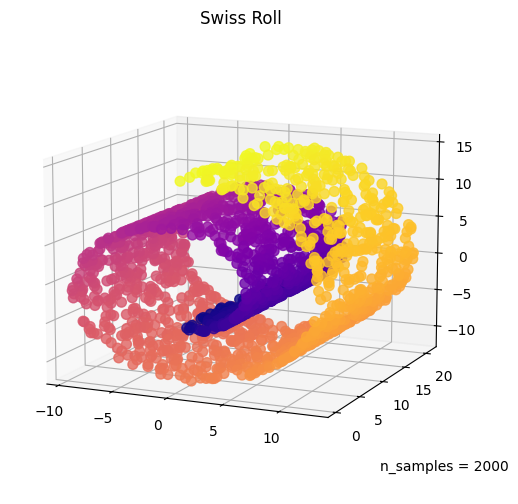

In [11]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1, projection="3d")
fig.add_axes(ax)
ax.scatter(sr_X[0][:, 0], sr_X[0][:, 1], sr_X[0][:, 2], s=50, c=sr_color, alpha=0.8, cmap='plasma')

ax.set_title("Swiss Roll")
ax.view_init(azim=-66, elev=12)
_ = ax.text2D(0.8, 0.05, s="n_samples = 2000", transform=ax.transAxes)

/mnt/c/Users/samue/.cache/pypoetry/virtualenvs/ml-notes-EJuCGLas-py3.12/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


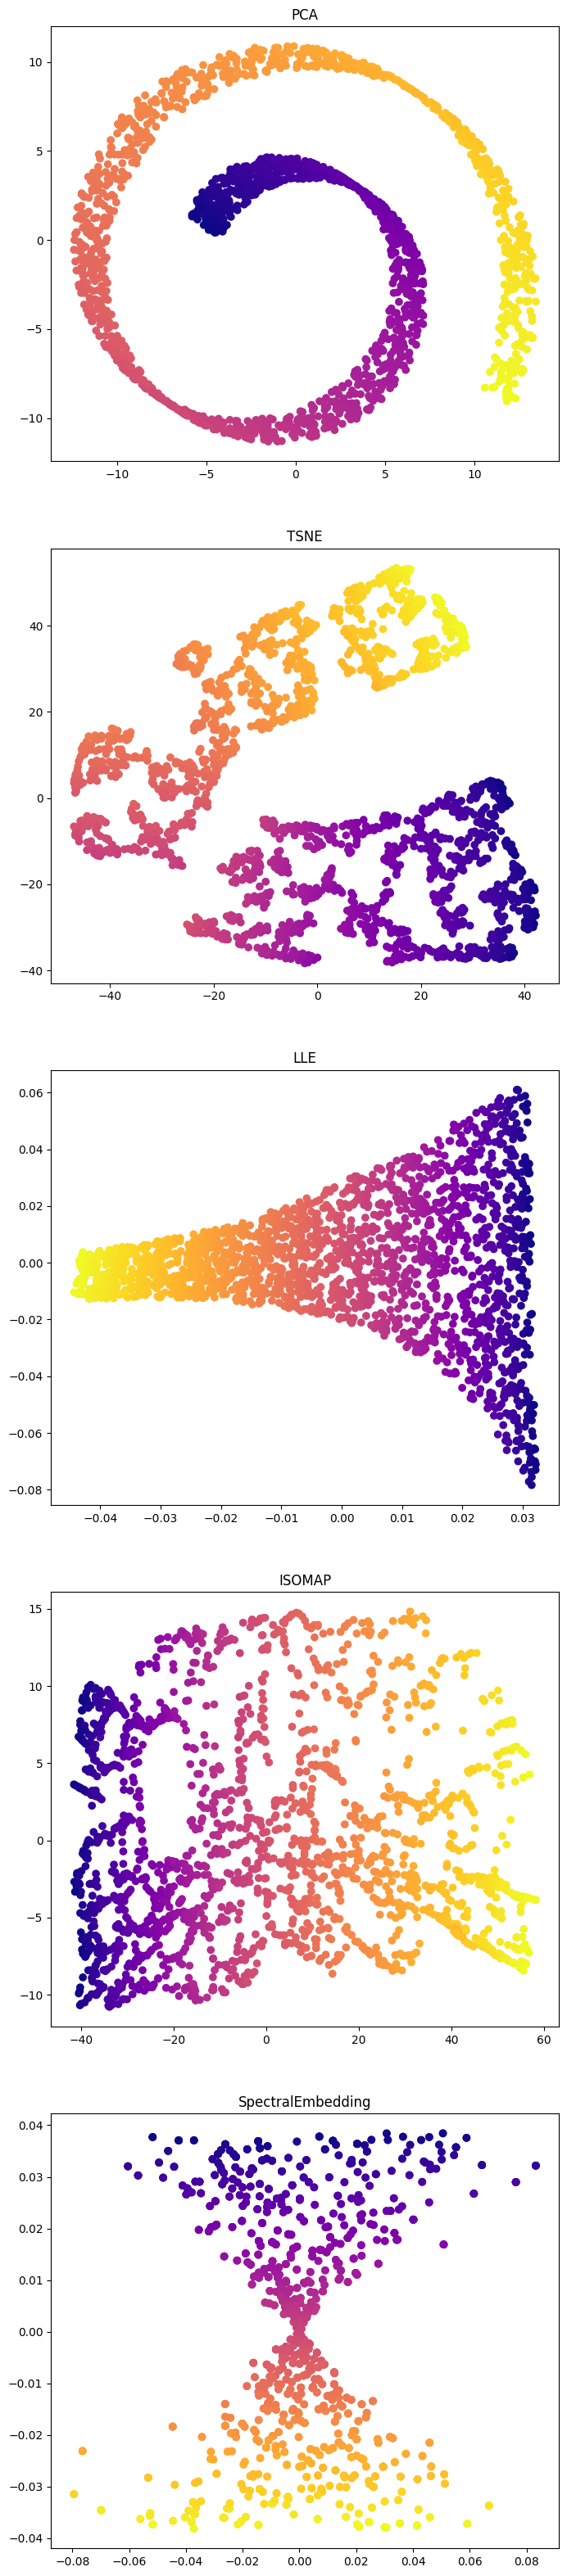

In [29]:
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap, LocallyLinearEmbedding, SpectralEmbedding, TSNE

manifolds = {'PCA': PCA(n_components=2, random_state=42),
             'TSNE': TSNE(n_components=2, random_state=42),
             'LLE': LocallyLinearEmbedding(n_components=2, n_neighbors=12, random_state=42),
             'ISOMAP': Isomap(n_components=2),
             'SpectralEmbedding': SpectralEmbedding(n_components=2, random_state=42, n_neighbors=2)
             }

fig, axs = plt.subplots(figsize=(8, 40), nrows=len(manifolds))

for i, (manifold, model) in enumerate(manifolds.items()):
    X_new = model.fit_transform(sr_X[0])
    axs[i].scatter(X_new[:, 0], X_new[:, 1], c = sr_color, cmap = "plasma")
    axs[i].set_title(manifold)